# Lab 1 -- Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

## 1. The data

In [2]:
# Load the dataset
# The first two columns contains the exam scores and the third column
# contains the label.
data = np.loadtxt('data1.txt', delimiter=',')
 
X = data[:, 0:2]
y = data[:, 2]

In [33]:
y

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

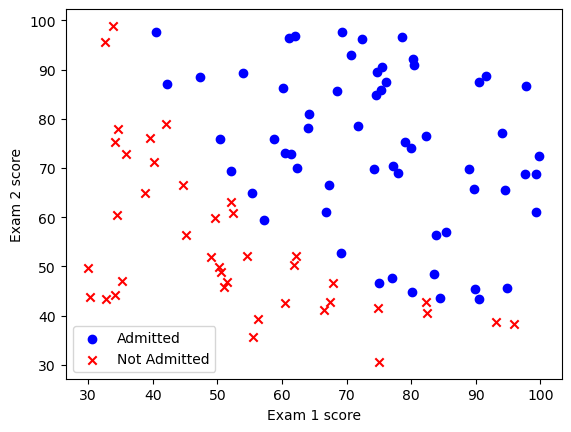

In [3]:
# Plot data 
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()

In [4]:
#Add intercept term to X
X_new = np.ones((X.shape[0], 3))
X_new[:, 1:] = X
X = X_new

## 2. What is logistic regression 

Logistic regression may be explained from a probabilistic perspective. 

Let us denote $x_{1:m}, y_{1:m} \sim X, Y$ i.i.d observations of $X \in \mathbb{R}^p, Y \in \{0,1\}$.

### The model

Let us consider the following regression model to explain the data
\begin{equation*}
    P_{Y|X=x} = \mathrm{Ber}(p = \sigma(x^\top \theta))
\end{equation*}

### Maximizing the likelihood
Under this model, the probability of observing $(x_i, y_i)$ is
\begin{align*}
    p_{Y|X=x_i}(y_i) &= p^{y_i} (1-p)^{1-y_i} \\
    &= \sigma(x_i^\top\theta)^{y_i} (1-\sigma(x_i^\top\theta))^{1-y_i}
\end{align*}

The optimal value of $\theta$ is chosen to maximize the likelihood of observations that is
\begin{align*}
    \theta^* &= \underset{\theta}{\text{arg max}} \prod_{i=1}^m p_{Y|X=x_i}(y_i) \\
    &= \underset{\theta}{\text{arg max}} \sum_{i=1}^m \log p_{Y|X=x_i}(y_i) \\
    &= \underset{\theta}{\text{arg max}} \sum_{i=1}^m y_i \log \sigma(\theta^\top x_i) + (1-y_i) \log (1-\sigma(\theta^\top x_i)) \\
    &= \underset{\theta}{\text{arg min}} -\frac{1}{m} \sum_{i=1}^m y_i \log \sigma(\theta^\top x_i) + (1-y_i) \log (1-\sigma(\theta^\top x_i)) \\
    &= \underset{\theta}{\text{arg min}} \quad J(\theta)
\end{align*}

## 3. Implementation

### 3.1 The sigmoid

In [5]:
# Sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Logit function
def logit(z):
    return np.log(z/(1-z))

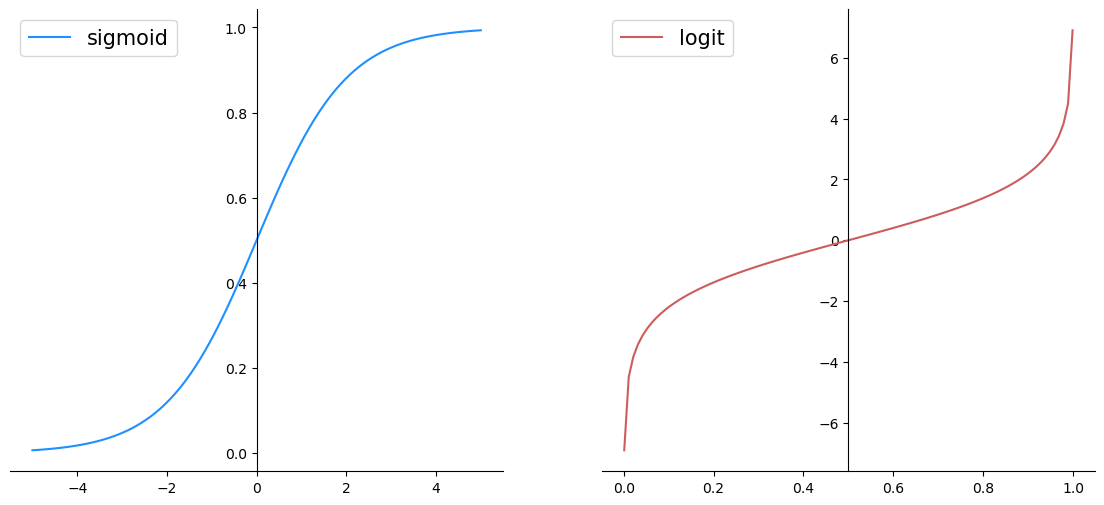

In [6]:
# Plot sigmoid and logit
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
Xplot = np.linspace(-5, 5, 100)
Yplot = sigmoid(Xplot)
ax[0].plot(Xplot, Yplot, color='dodgerblue', label='sigmoid')
Xplot = np.linspace(0.001, 0.999, 100)
Yplot = logit(Xplot)
ax[1].plot(Xplot, Yplot, color='indianred', label='logit')
for i in range(2):
    ax[i].legend(loc='best', fontsize=15)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_position('center')
plt.show(fig)

In [7]:
def test_sigmoid():
    # scalar test
    z, s = 0.5, 0.622459
    if np.abs(sigmoid(z)-s) < 1e-5:
        print("scalar test passed")
    else:
        raise ValueError("scalar test not passed!")
        
    # vector test
    z, s = np.array([1,-1,0.5]), np.array([0.73105858, 0.26894142, 0.62245933])
    if np.sum(np.abs(sigmoid(z)-s)) < 1e-5:
        print("vector test passed")
    else:
        raise ValueError("vector test not passed!")
        
test_sigmoid()

scalar test passed
vector test passed


### 3.2 The cost function $J(\theta)$

The cost function is the following

\begin{equation}
    J_\theta = -\frac{1}{m} \sum_{i=1}^m y_i \log(\sigma(x_i^T\theta)) + (1-y_i) \log(1 -\sigma(x_i^T\theta))
\end{equation}

In a matrix notation
\begin{equation}
    \text{PLEASE FIND THE MATRIX FORM}
\end{equation}

In [15]:
# Dependence on X,y is implicit
# X, y are defined globally
def computeCost(theta):
    c1 = 0
    c2 = 0
    m = len(y)
    for i in range(m) : 
        c1 =c1 + y[i]*np.log(sigmoid(np.matmul(X[i,:], theta)))
        c2 =c2 + (1-y[i])*np.log(1-sigmoid(np.matmul(X[i,:], theta)))
    J_theta = -(c1+c2)/m
    return J_theta

In [16]:
def test_computeCost():
    # test 1
    theta, cost = [0, 0, 0], 0.6931471
    if np.abs(computeCost(theta)-cost) < 1e-5:
        print("test 1 passed")
    else:
        raise ValueError("test 1 not passed!")
        
    # test 2
    theta, cost = [-0.01, 0.05, 0], 1.092916
    if np.abs(computeCost(theta)-cost) < 1e-5:
        print("test 2 passed")
    else:
        raise ValueError("test 2 not passed!")
        
test_computeCost()

test 1 passed
test 2 passed


### 3.3 The gradient function

The gradient of the cost function is given by
\begin{equation}
    \text{PLEASE FIND THE GRADIENT}
\end{equation}

In [21]:
# Dependence on X,y is implicit
# X, y are defined globally
def computeGrad(theta):
    # Computes the gradient of the cost with respect to
    # the parameters.
    m = len(y)
    gradient_theta = 0
    
    for i in range(m) : 
        gradient_theta = gradient_theta + (sigmoid(np.matmul(X[i,:],theta))-y[i])*X[i,:]
    
    gradient_theta = gradient_theta/m
    return gradient_theta

In [22]:
def test_computeGrad():
    # test 1
    theta, grad = [0, 0, 0], np.array([ -0.1, -12.00921659, -11.26284221])
    if np.sum(np.abs(computeGrad(theta)-grad)) < 1e-5:
        print("test 1 passed")
    else:
        raise ValueError("test 1 not passed!")
        
    # test 2
    theta, grad = [0.02, 0, -0.04], np.array([-0.51775522, -39.39901278, -39.85199474])
    if np.sum(np.abs(computeGrad(theta)-grad)) < 1e-5:
        print("test 2 passed")
    else:
        raise ValueError("test 2 not passed!")
        
test_computeGrad()

[ -0.1        -12.00921659 -11.26284221]
test 1 passed
[ -0.51775522 -39.39901278 -39.85199474]
test 2 passed


### 3.4 Solve the optimization problem (i.e., fit the model to the data)

In [30]:
# Run minimize() to obtain the optimal theta
theta = [0.1,0.1,0.1]
Result = op.minimize(fun=computeCost, x0=theta, 
                     method = 'TNC', jac=computeGrad);

[ 0.39997223 20.81184964 21.84684953]
[ 0.39997223 20.81184964 21.84684953]
[ -0.599972   -44.830261   -44.37253462]
[ -0.10439596 -12.14284535 -11.84026776]
[ 0.39707257 20.67107037 21.69280286]
[ 0.35767804 18.41942768 19.33126279]
[ 0.23366186 10.60257169 11.26521029]
[0.09191233 1.20053971 1.66058334]
[0.09191233 1.20053952 1.66058311]
[ 0.06762465 -0.27216318 -0.1507393 ]
[ 0.067625   -0.27213929 -0.15071549]
[ 0.07114005 -0.03244973  0.08832988]
[ 0.07114005 -0.03244973  0.08832988]
[-0.01971283 -1.50422692 -4.12928505]
[-0.01971283 -1.50422677 -4.12928494]
[-0.00826558  0.21615265 -2.90054502]
[-0.00539956  1.05437924 -2.45221991]
[-0.0057701   0.78910279 -2.56501083]
[-0.0057701   0.78910287 -2.56501072]
[0.03074717 2.97251307 0.09188408]
[0.03074717 2.97251293 0.09188402]
[ 0.0115386   1.7030055  -0.42667519]
[ 0.00638601  1.32619101 -0.55062742]
[ 0.00638848  1.32629906 -0.55044691]
[0.03722023 2.65312125 1.62279768]
[0.01951757 1.89776884 0.39407389]
[0.02768225 2.24863375 0

In [31]:
Result

 message: Converged (|f_n-f_(n-1)| ~= 0)
 success: True
  status: 1
     fun: 0.20349773267433044
       x: [-2.515e+01  2.061e-01  2.014e-01]
     nit: 19
     jac: [-2.273e-06 -2.511e-04 -5.550e-04]
    nfev: 51

### 3.5 Visualize the fit

The decision boundary is given by

\begin{equation}
\sigma(\theta^T x) = 0.5 \iff \theta^T x = 0
\end{equation}

i.e
\begin{equation}
  x_2 = -\frac{\theta_1}{\theta_2}x_1 - \frac{\theta_0}{\theta_2}
\end{equation}

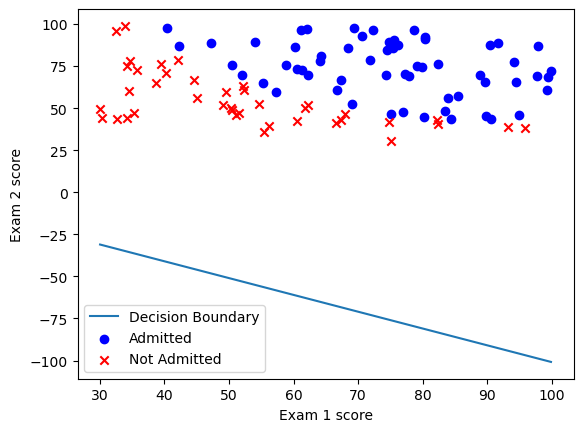

In [32]:
# Plot the decision boundary
plot_x = np.array([min(X[:, 1]), max(X[:, 1])])
plot_y = (- 1.0 / theta[2]) * (theta[1] * plot_x + theta[0])
plt.plot(plot_x, plot_y)
plt.scatter(X[pos, 1], X[pos, 2], marker='o', c='b')
plt.scatter(X[neg, 1], X[neg, 2], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Decision Boundary', 'Admitted', 'Not Admitted'])
plt.show()

### 3.6 Evaluate the model

In [42]:
def predict(theta, X):
    
    m = len(X)
    
    prob_1 = sigmoid(np.matmul(X,theta))
    prob_2 = 1-sigmoid(np.matmul(X,theta))
    
    y_pred = []
    
    for i in range(len(prob_1)) : 
        
        if prob_1[i] > prob_2[i] : 
            
            y_pred[i] = 1
            
        else : 
            
            y_pred[i] = 0
            
    print(y_pred)
    return y_pred
    
    

In [43]:
def test_predict():
    # test 1
    X_test, y_pred = np.array([[1,40, 20], [1,40,80], [1,80,80]]), np.array([0,0,1])
    if np.sum(np.abs(y_pred - predict(Result.x, X_test))) == 0:
        print("test 1 passed")
    else:
        raise ValueError("test 1 not passed!")

    # test 2
    X_test, y_pred = np.array([[1,70, 50], [1,70,40]]), np.array([0,0])
    if np.sum(np.abs(y_pred - predict(Result.x, X_test))) == 0:
        print("test 2 passed")
    else:
        raise ValueError("test 2 not passed!")
        
test_predict()

IndexError: list assignment index out of range

In [ ]:
# Compute accuracy on the training set
p = predict(Result.x, X)
counter = 0
for i in range(y.size):
    if p[i] == y[i]:
        counter += 1
print('Train Accuracy: {:.2f}'.format(counter / float(y.size) * 100.0))